
    Main idea is to reduce the dimensionality of the data
    Dimensions of data means columns in the data
    Feature selection means choosing important feature
    Dimensionality Reduction is about deriving new features (m) out of original features (n)
    m < n

    You don't want to compromise in accuracy.

    This is achieved by transforming variables(columns) to a new set of columns or variables which are known as principal component
    These principal components have a parameter telling how important they are in representing the data


In [86]:
from sklearn.decomposition import PCA

In [87]:
from sklearn.datasets import load_breast_cancer

In [88]:
breast_cancer_data = load_breast_cancer()

In [89]:
breast_cancer_data.data.shape

(569, 30)

In [90]:
breast_cancer_data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [91]:
from sklearn.preprocessing import MinMaxScaler

In [92]:
mm = MinMaxScaler()

In [93]:
data = mm.fit_transform(breast_cancer_data.data)

In [94]:
data.shape

(569, 30)

In [95]:
pca = PCA(n_components=10)

In [96]:
res = pca.fit_transform(data)

In [97]:
res.shape

(569, 10)

In [98]:
data[0]

array([0.52103744, 0.0226581 , 0.54598853, 0.36373277, 0.59375282,
       0.7920373 , 0.70313964, 0.73111332, 0.68636364, 0.60551811,
       0.35614702, 0.12046941, 0.3690336 , 0.27381126, 0.15929565,
       0.35139844, 0.13568182, 0.30062512, 0.31164518, 0.18304244,
       0.62077552, 0.14152452, 0.66831017, 0.45069799, 0.60113584,
       0.61929156, 0.56861022, 0.91202749, 0.59846245, 0.41886396])

In [99]:
res[0]

array([ 1.38702121,  0.42689533, -0.54170264,  0.04848322, -0.07219809,
        0.1908169 ,  0.23631339, -0.03945691,  0.07758484,  0.15528944])

In [100]:
pca.components_.shape

(10, 30)

In [101]:
pca.explained_variance_

array([0.33133389, 0.10785038, 0.0443947 , 0.04000678, 0.02549742,
       0.01916637, 0.00986455, 0.00743488, 0.00616788, 0.00589966])

In [102]:
pca.explained_variance_.cumsum()

array([0.33133389, 0.43918427, 0.48357897, 0.52358575, 0.54908317,
       0.56824954, 0.5781141 , 0.58554898, 0.59171685, 0.59761651])

In [103]:
import pandas as pd

In [104]:
df = pd.DataFrame({'A':[1,2,3,4,5],'B':[1,2,3,4,5]})

In [105]:
pca = PCA(n_components=1)

In [106]:
pca.fit_transform(df)

array([[ 2.82842712],
       [ 1.41421356],
       [-0.        ],
       [-1.41421356],
       [-2.82842712]])

In [107]:
pca.components_

array([[-0.70710678, -0.70710678]])

In [108]:
pca.explained_variance_

array([5.])

In [109]:
df['C'] = 10  # no variance in data

In [110]:
pca = PCA(n_components=3)

In [111]:
pca.fit_transform(df)

array([[ 2.82842712e+00,  2.97904098e-16,  0.00000000e+00],
       [ 1.41421356e+00, -9.93013661e-17,  0.00000000e+00],
       [-0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.41421356e+00,  9.93013661e-17,  0.00000000e+00],
       [-2.82842712e+00,  1.98602732e-16,  0.00000000e+00]])

In [112]:
pca.explained_variance_

array([5.00000000e+00, 3.69778549e-32, 0.00000000e+00])

In [113]:
df

,A,B,C
0,1,1,10
1,2,2,10
2,3,3,10
3,4,4,10
4,5,5,10


In [114]:
from sklearn.preprocessing import StandardScaler

data = breast_cancer_data.data
target = breast_cancer_data.target

In [115]:
ss = StandardScaler()

In [116]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [117]:
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [118]:
pipeline = make_pipeline(StandardScaler(),PCA(n_components=10),DecisionTreeClassifier())

In [119]:
pipeline.steps

[('standardscaler', StandardScaler()),
 ('pca', PCA(n_components=10)),
 ('decisiontreeclassifier', DecisionTreeClassifier())]

In [120]:
gs = GridSearchCV(pipeline,param_grid={'pca__n_components':[8,10,14,15,20]},cv = 5)

In [121]:
trainX, testX, trainY, testY = train_test_split(data, target)

In [122]:
gs.fit(trainX,trainY)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA(n_components=10)),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'pca__n_components': [8, 10, 14, 15, 20]})

In [123]:
gs.best_score_

0.9061012311901505

In [124]:
gs.best_params_

{'pca__n_components': 8}

In [125]:
pipeline = make_pipeline(StandardScaler(),PCA(n_components=10),LogisticRegression())
gs = GridSearchCV(pipeline,param_grid={'pca__n_components':[8,10,14,15,20]},cv = 5)
gs.fit(trainX,trainY)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA(n_components=10)),
                                       ('logisticregression',
                                        LogisticRegression())]),
             param_grid={'pca__n_components': [8, 10, 14, 15, 20]})

In [126]:
gs.best_score_

0.9718467852257182

In [127]:
gs.best_params_

{'pca__n_components': 10}

In [128]:
from sklearn.datasets import load_iris

In [129]:
iris = load_iris()


feature = iris.data

In [130]:
feature.shape

(150, 4)

In [131]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [132]:
target = iris.target

In [133]:
from sklearn.preprocessing import StandardScaler

In [134]:
ss = StandardScaler()

In [135]:
feature_std = ss.fit_transform(feature)

In [136]:
import numpy as np

In [137]:
feature_std.shape

(150, 4)

In [138]:
feature_std.T.shape

(4, 150)

In [139]:
covariance_matrix = np.cov(feature_std.T)

In [172]:
pd.DataFrame(np.cov(feature_std))

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,1.255555,0.642747,0.931364,0.788510,1.393177,1.630849,1.152592,1.126074,0.569669,0.786123,...,-0.643191,-0.567953,-0.837538,-0.537320,-0.432721,-0.686676,-1.131681,-0.575505,-0.152178,-0.437817
1,0.642747,0.329324,0.479601,0.407254,0.714498,0.834892,0.595252,0.577174,0.296431,0.402426,...,-0.327727,-0.292207,-0.423661,-0.274649,-0.218552,-0.351303,-0.579819,-0.294546,-0.071369,-0.219711
2,0.931364,0.479601,0.719019,0.622172,1.046766,1.209142,0.906945,0.843132,0.471552,0.584866,...,-0.466902,-0.443243,-0.570988,-0.396759,-0.296868,-0.513583,-0.846853,-0.428689,-0.051314,-0.279982
3,0.788510,0.407254,0.622172,0.547482,0.893301,1.021444,0.792271,0.719155,0.424778,0.500087,...,-0.402144,-0.402477,-0.460804,-0.340368,-0.252431,-0.451446,-0.726210,-0.369387,-0.022565,-0.214211
4,1.393177,0.714498,1.046766,0.893301,1.552366,1.808834,1.303420,1.253602,0.655823,0.874126,...,-0.711774,-0.644747,-0.905894,-0.596679,-0.471872,-0.767570,-1.260639,-0.640821,-0.141842,-0.464256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,-0.686676,-0.351303,-0.513583,-0.451446,-0.767570,-0.882179,-0.636258,-0.625032,-0.329635,-0.450583,...,0.408507,0.397038,0.457554,0.320083,0.295703,0.448812,0.648461,0.342822,0.116351,0.225607
146,-1.131681,-0.579819,-0.846853,-0.726210,-1.260639,-1.466008,-1.051764,-1.020156,-0.530514,-0.716995,...,0.599862,0.550211,0.744467,0.494198,0.408227,0.648461,1.033091,0.530076,0.137591,0.380084
147,-0.575505,-0.294546,-0.428689,-0.369387,-0.640821,-0.743792,-0.530881,-0.519713,-0.268335,-0.368247,...,0.316478,0.293548,0.383403,0.256316,0.220803,0.342822,0.530076,0.274551,0.082061,0.195111
148,-0.152178,-0.071369,-0.051314,-0.022565,-0.141842,-0.193379,-0.024906,-0.124044,0.031855,-0.103392,...,0.134271,0.069291,0.215657,0.084553,0.141752,0.116351,0.137591,0.082061,0.177851,0.146910


In [140]:
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

In [141]:
eigen_values,eigen_vectors = np.linalg.eig(covariance_matrix)

In [142]:
eigen_values # first 2 features most important

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [143]:
eigen_vectors

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [144]:
matrix_trf = eigen_vectors[:,:2]
matrix_trf

array([[ 0.52106591, -0.37741762],
       [-0.26934744, -0.92329566],
       [ 0.5804131 , -0.02449161],
       [ 0.56485654, -0.06694199]])

In [145]:
feature_pca = feature_std.dot(matrix_trf)
feature_pca

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538],
       [-2.07563095, -1.48917752],
       [-2.44402884, -0.0476442 ],
       [-2.23284716, -0.22314807],
       [-2.33464048,  1.11532768],
       [-2.18432817,  0.46901356],
       [-2.1663101 , -1.04369065],
       [-2.32613087, -0.13307834],
       [-2.2184509 ,  0.72867617],
       [-2.6331007 ,  0.96150673],
       [-2.1987406 , -1.86005711],
       [-2.26221453, -2.68628449],
       [-2.2075877 , -1.48360936],
       [-2.19034951, -0.48883832],
       [-1.898572  , -1.40501879],
       [-2.34336905, -1.12784938],
       [-1.914323  , -0.40885571],
       [-2.20701284, -0.92412143],
       [-2.7743447 , -0.45834367],
       [-1.81866953, -0.08555853],
       [-2.22716331, -0.13725446],
       [-1.95184633,  0.62561859],
       [-2.05115137, -0.24216355],
       [-2.16857717, -0.52714953],
       [-2.13956345,

In [146]:
import matplotlib.pyplot as plt
%matplotlib inline

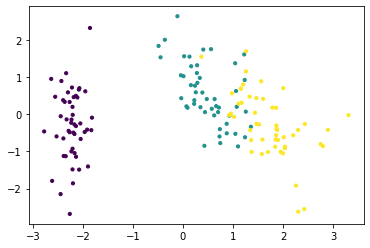

In [147]:
plt.scatter(feature_pca[:,0],feature_pca[:,1],c = target,s=10)

In [148]:
from sklearn.decomposition import PCA

In [149]:
pca = PCA(n_components=2)

In [150]:
feature_pca = pca.fit_transform(feature_std)

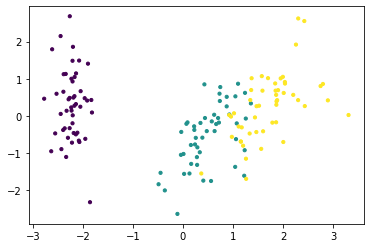

In [151]:
plt.scatter(feature_pca[:,0], feature_pca[:,1],c=target, s=10)

In [152]:
pca.explained_variance_

array([2.93808505, 0.9201649 ])

In [153]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [154]:
round(sum(list(pca.explained_variance_ratio_))*100, 2) # Means our first two principal components explain the majority 
                                                    #of the variance in this dataset (95.81%)! This is an indication 
                                                    #of the total information represented compared to the original data

95.81

In [155]:
pca.components_

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

In [156]:


class MyPCA:
    
    def __init__(self,n_components=2):
        self.n_components = n_components
        
    def fit(self, feature):
        cov_mat = np.cov(feature.T)
        self.eig_vals, self.eig_vecs = np.linalg.eig(cov_mat)
        self.projection_matrix = self.eig_vecs[:,:self.n_components] 
        
    def transform(self,feature):
        return feature.dot(self.projection_matrix)

In [157]:
mypca = MyPCA(n_components=2)
mypca.fit(feature_std)

In [158]:
mypca.transform(feature_std)[:5]

array([[-2.26470281, -0.4800266 ],
       [-2.08096115,  0.67413356],
       [-2.36422905,  0.34190802],
       [-2.29938422,  0.59739451],
       [-2.38984217, -0.64683538]])

In [159]:
mypca.eig_vals

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

LDA ( Linear Discriminant Analysis) also transforms the data but considers class information of the data

Important Points

    Both PCA & LDA are linear transformation
    LDA is supervised
    PCA is unsupervised
    LDA attends a subspace that maximizes class separability
    Number of components can be decided using GridSearch
    PCA's objective is denoising & dimensionality reduction
    LDA's objective is to make data ready for classifier

In [160]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [161]:
lda = LinearDiscriminantAnalysis(n_components=2)

In [162]:
feature_lda = lda.fit_transform(feature_std,target)

In [163]:
from sklearn.pipeline import make_pipeline

In [164]:
lda_pipeline = make_pipeline(LinearDiscriminantAnalysis(n_components=2),LogisticRegression())

In [165]:
pca_pipeline = make_pipeline(PCA(n_components=2),LogisticRegression())

In [166]:
trainX, testX, trainY, testY = train_test_split(feature_std, target)

In [167]:
pca_pipeline.fit(trainX,trainY)

Pipeline(steps=[('pca', PCA(n_components=2)),
                ('logisticregression', LogisticRegression())])

In [168]:
pca_pipeline.score(testX,testY)

0.9210526315789473

In [169]:
lda_pipeline.fit(trainX,trainY)

Pipeline(steps=[('lineardiscriminantanalysis',
                 LinearDiscriminantAnalysis(n_components=2)),
                ('logisticregression', LogisticRegression())])

In [170]:
lda_pipeline.score(testX,testY)

1.0